In [7]:
# !git clone https://github.com/TOnodera/review-deep-learning.git
!ls /content/review-deep-learning/


ch01  common  dataset  Dockerfile  env.test.ipynb  requirements.txt


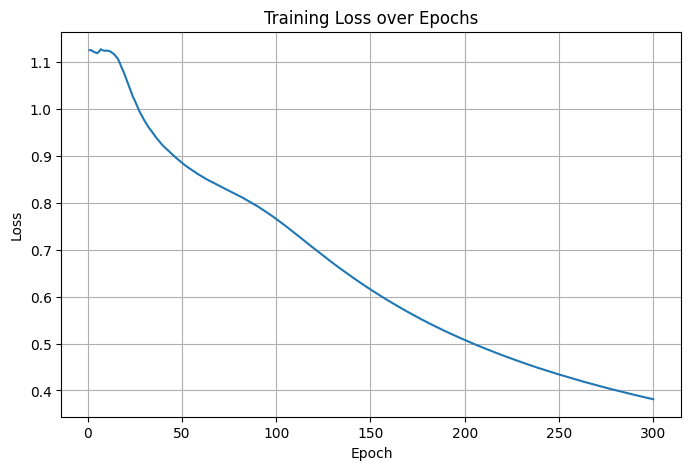

In [12]:
import sys
sys.path.append("/content/review-deep-learning/ch01")
import numpy as np
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# データの読み込み、モデルとオプティマイザーの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []


for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters * batch_size : (iters + 1) * batch_size]
        batch_t = t[iters * batch_size : (iters + 1) * batch_size]

        # 勾配を求めてパラメーターを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        # 損失の記録
        total_loss += loss
        loss_count += 1

    # エポックごとの損失を記録
    avg_loss = total_loss / loss_count
    loss_list.append(avg_loss)

# グラフ描画
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_epoch + 1), loss_list)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
